# Diamonds price prediction

## Gayatri Jadhav
### Roll no : 36

In [1]:
import numpy as np
import pandas as pd
import pickle 
import json
import warnings 

import matplotlib.pyplot as plt 
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm
from scipy.stats import shapiro, kstest, normaltest, skew

warnings.filterwarnings('ignore')

### Problem statement

To predict diamonds prices based on following features.

Features : 'carat'
            'cut'
            'color'
            'clarity'
            'depth'
            'table'
            'price'
            'x'
            'y'
            'z'

### Data Gathering

In [2]:
df = pd.read_csv('DiamondsPrices.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### EDA 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [18]:
df.isna().sum().T

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [4]:
df.select_dtypes(exclude=object)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


### Feature Engineering

#### 1. Carat

In [75]:
df['carat']

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

#### 2. Cut

In [21]:
df['cut'].value_counts().to_dict()

{'Ideal': 21551,
 'Premium': 13791,
 'Very Good': 12082,
 'Good': 4906,
 'Fair': 1610}

In [5]:
df['cut'].replace({'Ideal': 1, 'Premium': 2, 'Very Good': 3, 'Good': 4, 'Fair': 5},inplace = True)

In [6]:
cut_labels = {'Ideal': 1, 'Premium': 2, 'Very Good': 3, 'Good': 4, 'Fair': 5}

#### 3. Color

In [30]:
df['color'].value_counts().to_dict()

{'G': 11292, 'E': 9797, 'F': 9542, 'H': 8304, 'D': 6775, 'I': 5422, 'J': 2808}

In [7]:
df['color'].replace({'G': 0, 'E': 1, 'F': 2, 'H': 3, 'D': 4, 'I': 5, 'J': 6}, inplace = True)

In [8]:
color_labels = {'G': 0, 'E': 1, 'F': 2, 'H': 3, 'D': 4, 'I': 5, 'J': 6}

#### 4. Clarity

In [57]:
df['clarity'].value_counts().to_dict()

{0: 13065, 1: 12258, 2: 9194, 3: 8171, 4: 5066, 5: 3655, 6: 1790, 7: 741}

In [9]:
df['clarity'].replace({'SI1': 1, 'VS2': 4, 'SI2': 2, 'VS1': 3, 'VVS2': 6, 'VVS1': 5, 'IF': 7,
             'I1': 0}, inplace = True)

In [10]:
clarity_labels ={'SI1': 1, 'VS2': 4, 'SI2': 2, 'VS1': 3, 'VVS2': 6, 'VVS1': 5, 'IF': 7,
             'I1': 0}

#### 5. Depth

In [28]:
df['depth']

0        61.5
1        59.8
2        56.9
3        62.4
4        63.3
         ... 
53935    60.8
53936    63.1
53937    62.8
53938    61.0
53939    62.2
Name: depth, Length: 53940, dtype: float64

#### 6. Table

In [29]:
df['table']

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

#### 7. Price

In [30]:
df['price']

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

#### 8. X

In [31]:
df['x']

0        3.95
1        3.89
2        4.05
3        4.20
4        4.34
         ... 
53935    5.75
53936    5.69
53937    5.66
53938    6.15
53939    5.83
Name: x, Length: 53940, dtype: float64

#### 9. Y

In [32]:
df['y']

0        3.98
1        3.84
2        4.07
3        4.23
4        4.35
         ... 
53935    5.76
53936    5.75
53937    5.68
53938    6.12
53939    5.87
Name: y, Length: 53940, dtype: float64

#### 10. Z

In [33]:
df['z']

0        2.43
1        2.31
2        2.31
3        2.63
4        2.75
         ... 
53935    3.50
53936    3.61
53937    3.56
53938    3.74
53939    3.64
Name: z, Length: 53940, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


### Feature Selection

### 1. Check linearity

In [35]:
df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.134967,0.173885,-0.329105,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,0.134967,1.000000,0.012873,-0.191444,0.218055,0.433405,0.053491,0.125565,0.121462,0.149323
color,0.173885,0.012873,1.000000,-0.039496,0.024448,0.021855,0.101777,0.157823,0.153911,0.156525
clarity,-0.329105,-0.191444,-0.039496,1.000000,-0.072858,-0.156206,-0.128791,-0.349119,-0.336199,-0.345614
depth,0.028224,0.218055,0.024448,-0.072858,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,0.433405,0.021855,-0.156206,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.053491,0.101777,-0.128791,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.125565,0.157823,-0.349119,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.121462,0.153911,-0.336199,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.149323,0.156525,-0.345614,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [12]:
df.corr()[['price']]

,price
carat,0.921591
cut,0.053491
color,0.101777
clarity,-0.128791
depth,-0.010647
table,0.127134
price,1.000000
x,0.884435
y,0.865421
z,0.861249


In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

<Axes: >

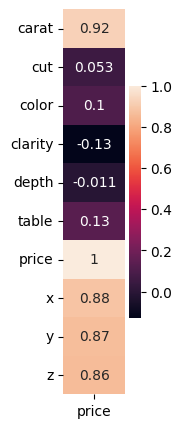

In [32]:
plt.figure(figsize= (1,5))
sns.heatmap(df.corr()[['price']], annot = True)

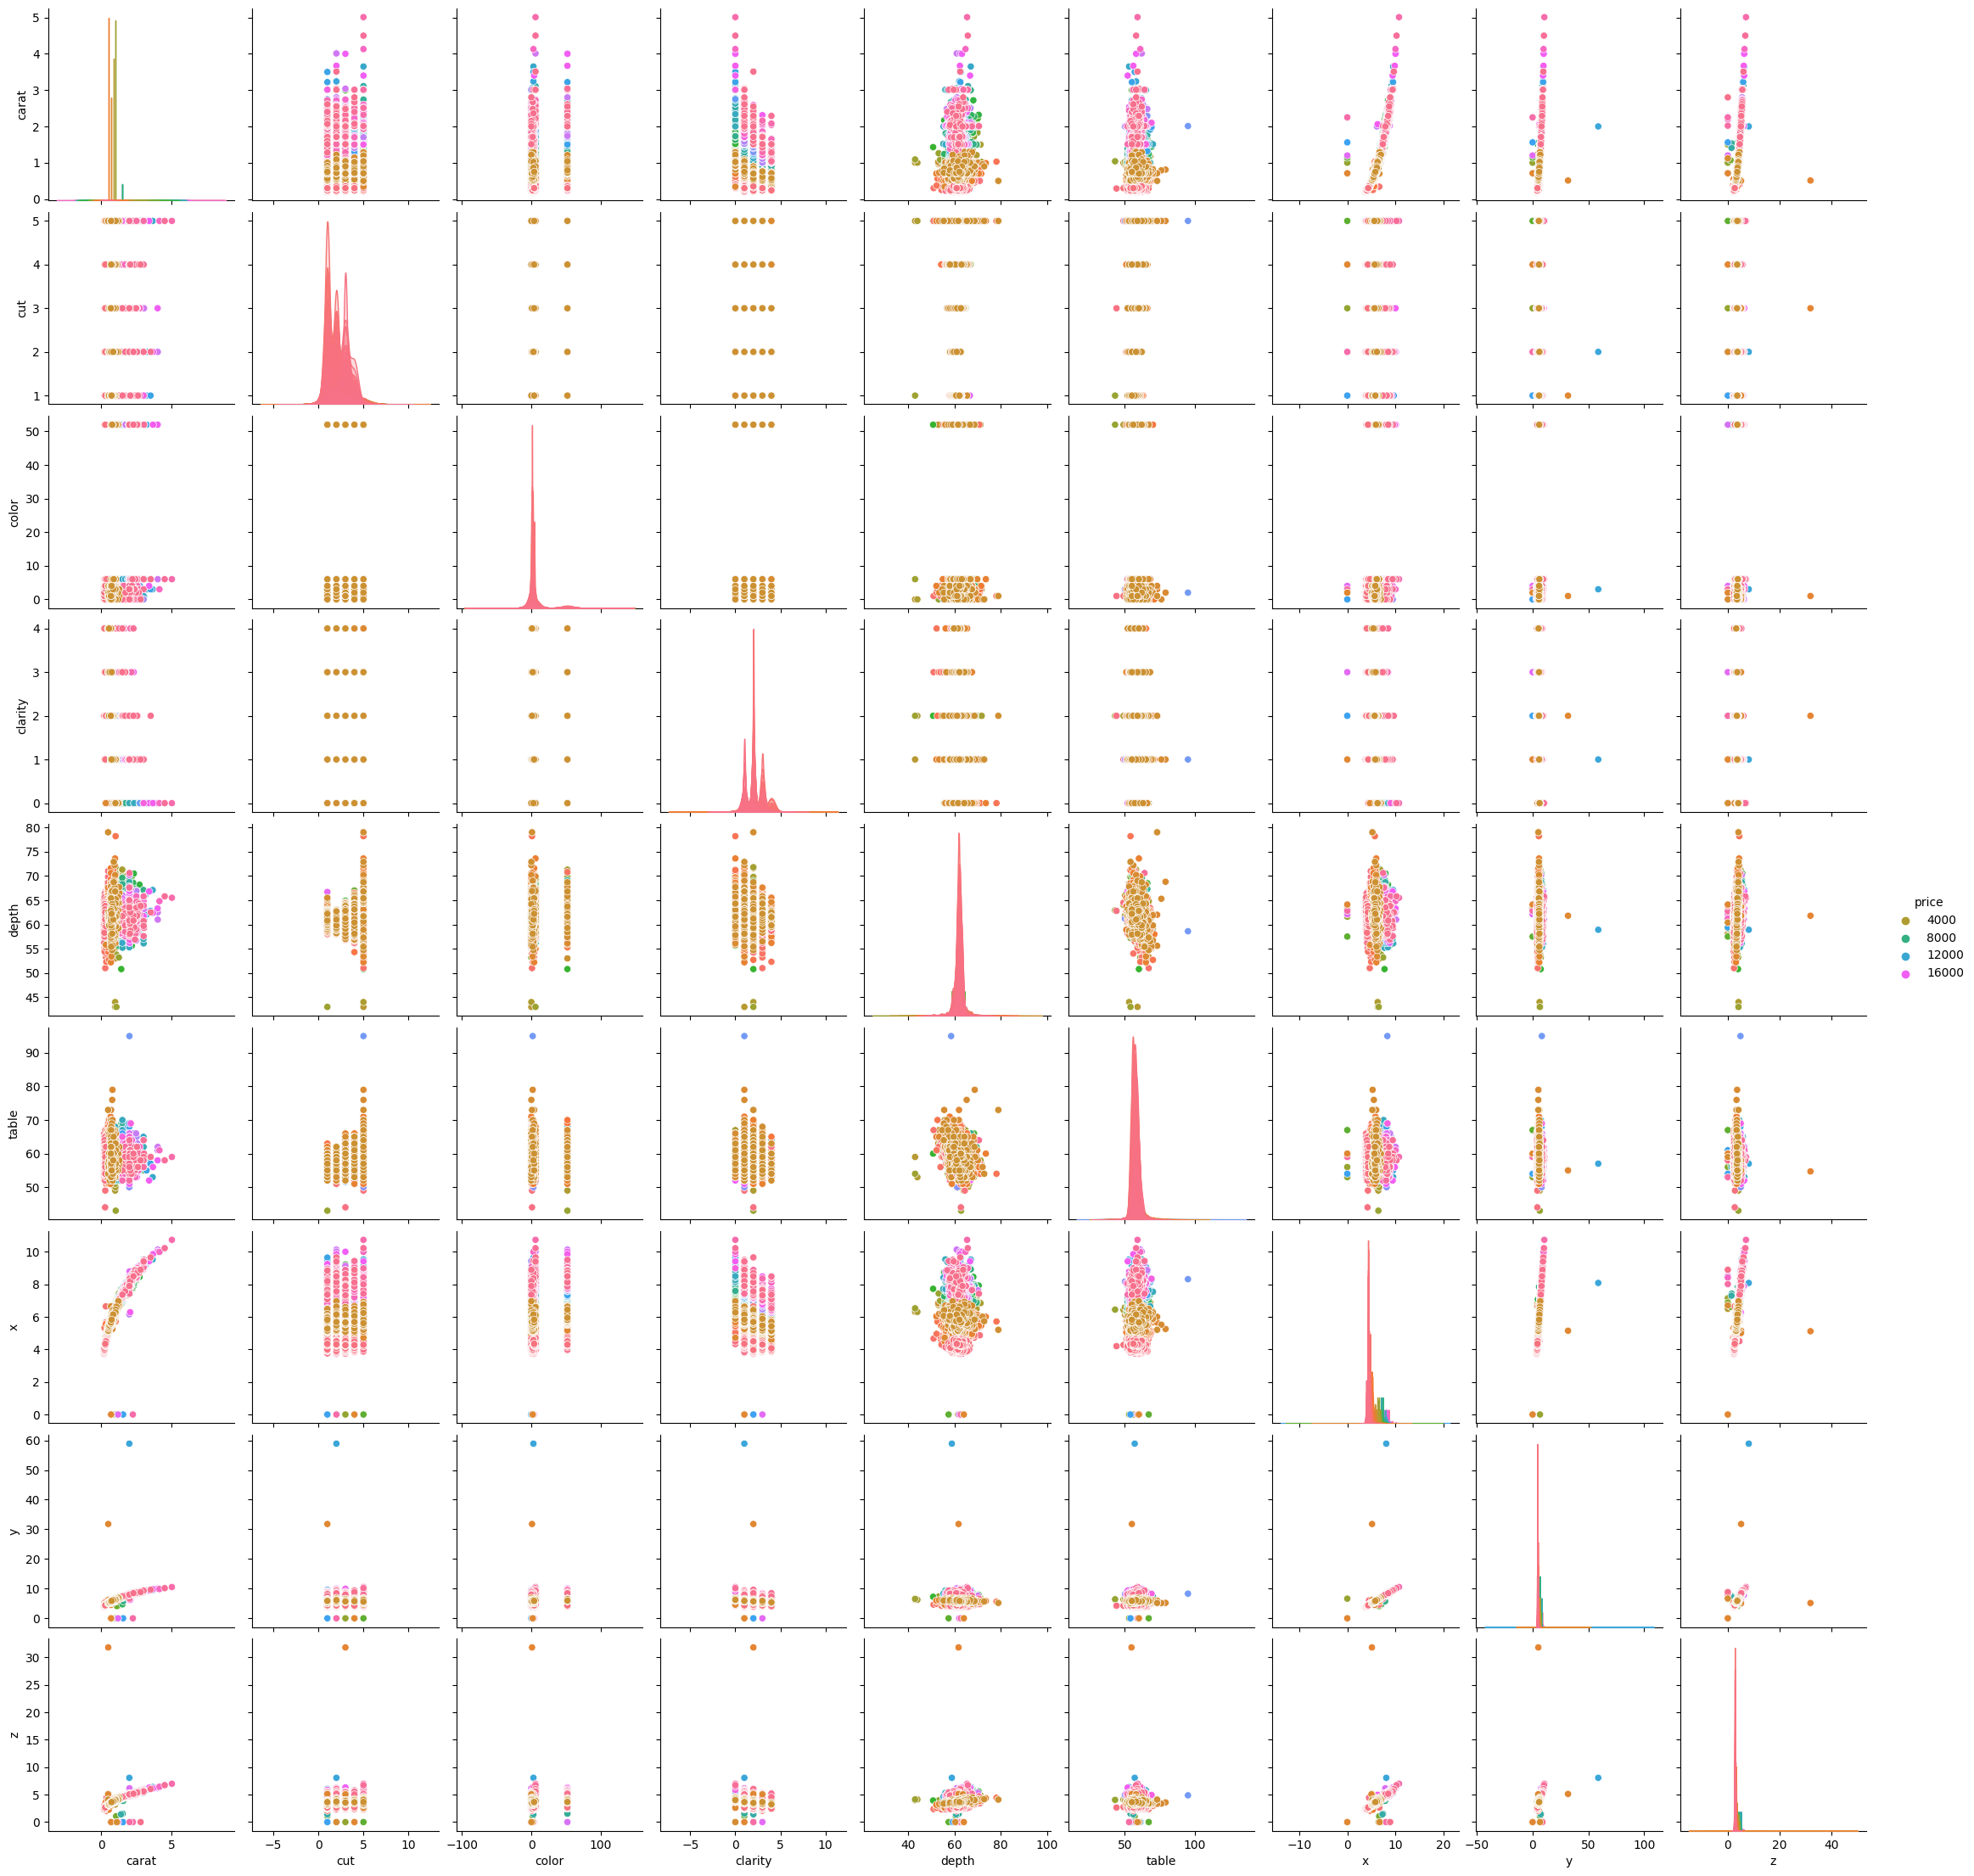

In [74]:
sns.pairplot(df, hue = "price", palette = "husl")
plt.show()

In [26]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### check Multicollinearity - VIF

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
x = df.drop('price', axis = 1)
y = df['price']

In [38]:
vif = []
for i in range(x.shape[1]):
    vif1= variance_inflation_factor(x.to_numpy(),i)
    vif.append(vif1)
    
pd.Series(vif,index = x.columns)


carat        72.913428
cut           5.505164
color         1.259000
clarity       6.299457
depth       540.499434
table       566.084254
x          1341.816373
y           531.665659
z           559.060286
dtype: float64

### Model Training

In [39]:
from sklearn.model_selection import train_test_split


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2,random_state=32)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

### Model Evaluation

In [43]:
linear_reg.predict(x_test)

array([ -501.24926109, 13760.25306469,  -332.11910946, ...,
        3436.24727129,   973.52087119,   458.65395729])

In [44]:
y_test

30073      720
24423    12674
32066      780
19077     7850
44176     1567
         ...  
34732      876
35155      891
2438      3185
30976      746
34803      877
Name: price, Length: 10788, dtype: int64

### Testing Data Evaluation

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
y_test_pred = linear_reg.predict(x_test)

mse = mean_squared_error(y_test , y_test_pred)
print("Mean Squared Error is               :", mse)

rmse = np.sqrt(mse)
print("Squareroot of Mean Squared Error is :", rmse)

mae = mean_absolute_error(y_test ,y_test_pred)
print("Mean Absolute Error is              :", mae)

r2_test_value = r2_score(y_test, y_test_pred)
print("R-Squared value is                  :", r2_test_value)

n = x_test.shape[0]
k = x_test.shape[1]
adj_r2 = 1 - ((1-r2_test_value) * (n-1)) / (n-k-1)
print("Adjusted R-Squared value is         :", adj_r2)

Mean Squared Error is               : 1710045.2214656698
Squareroot of Mean Squared Error is : 1307.6869738074436
Mean Absolute Error is              : 841.5723337097106
R-Squared value is                  : 0.8934098514610745
Adjusted R-Squared value is         : 0.8933208450278912


### Training Data Evaluation

In [47]:
y_train_pred = linear_reg.predict(x_train)

mse = mean_squared_error(y_train , y_train_pred)
print("Mean Squared Error is               :", mse)

rmse = np.sqrt(mse)
print("Squareroot of Mean Squared Error is :", rmse)

mae = mean_absolute_error(y_train , y_train_pred)
print("Mean Absolute Error is              :", mae)

r2_train_value = r2_score(y_train , y_train_pred)
print("R-Squared value is                  :", r2_train_value)

n = x_test.shape[0]
k = x_test.shape[1]
adj_r2 = 1 - ((1-r2_test_value) * (n-1)) / (n-k-1)
print("Adjusted R-Squared value is         :", adj_r2)

Mean Squared Error is               : 1716638.5509054568
Squareroot of Mean Squared Error is : 1310.2055376563849
Mean Absolute Error is              : 844.8736221253611
R-Squared value is                  : 0.8919215691628422
Adjusted R-Squared value is         : 0.8933208450278912


### Normality of residual

In [48]:
residual = y_train - y_train_pred
residual

14702     161.484761
18657    -124.189780
20677    2173.487678
19941     864.213158
31305     157.093031
            ...     
24828    2833.654107
20414    1082.375037
9526     -971.546192
42539    -404.595080
10967   -1886.135503
Name: price, Length: 43152, dtype: float64

### Visualization :

In [49]:
import statsmodels.api as sm

####  1. kde plot

<Axes: xlabel='price', ylabel='Density'>

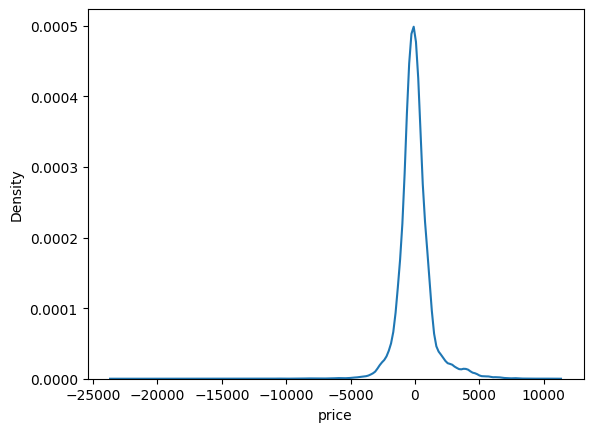

In [50]:
sns.kdeplot(residual)

####  2. hist plot

<Axes: xlabel='price', ylabel='Count'>

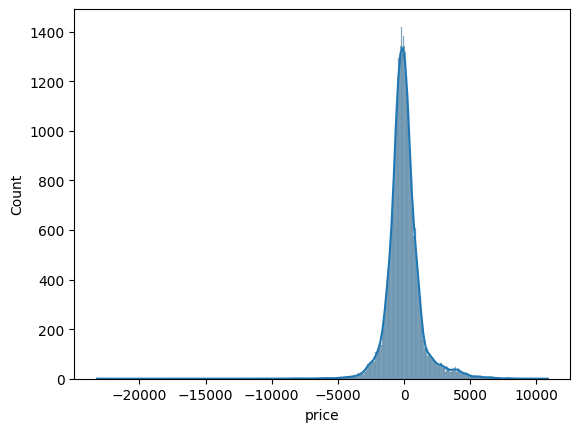

In [51]:
sns.histplot(residual, kde= True)

####  3. QQ plot

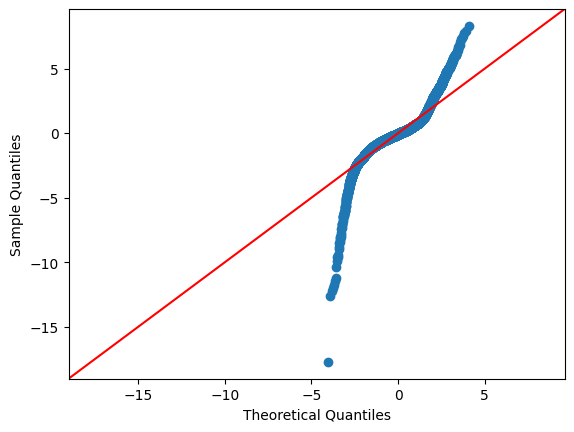

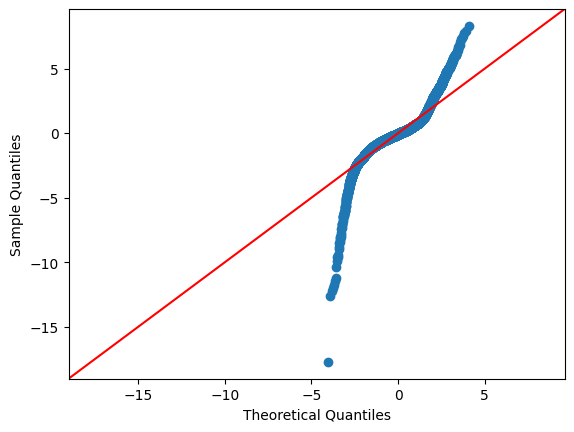

In [52]:
sm.qqplot(residual, line = '45', fit= True)

####  Hypothesis Test

In [53]:
from scipy.stats import shapiro, kstest, normaltest, skew

####  1. shapiro test

In [54]:
_,p_val = shapiro(residual)
print(p_val)

0.0


####  2. ks test

In [55]:
kstest(residual, 'norm')

KstestResult(statistic=0.5406566177232918, pvalue=0.0, statistic_location=-3.6108207947918345, statistic_sign=1)

####  3. normal test

In [56]:
_,p_val = normaltest(residual)
print(p_val)

0.0


#### Skewness

In [57]:
skew(residual)

0.20956317578406664

### Check homoscedasticity

Text(0.5, 1.0, 'Y Actual v/s Residual')

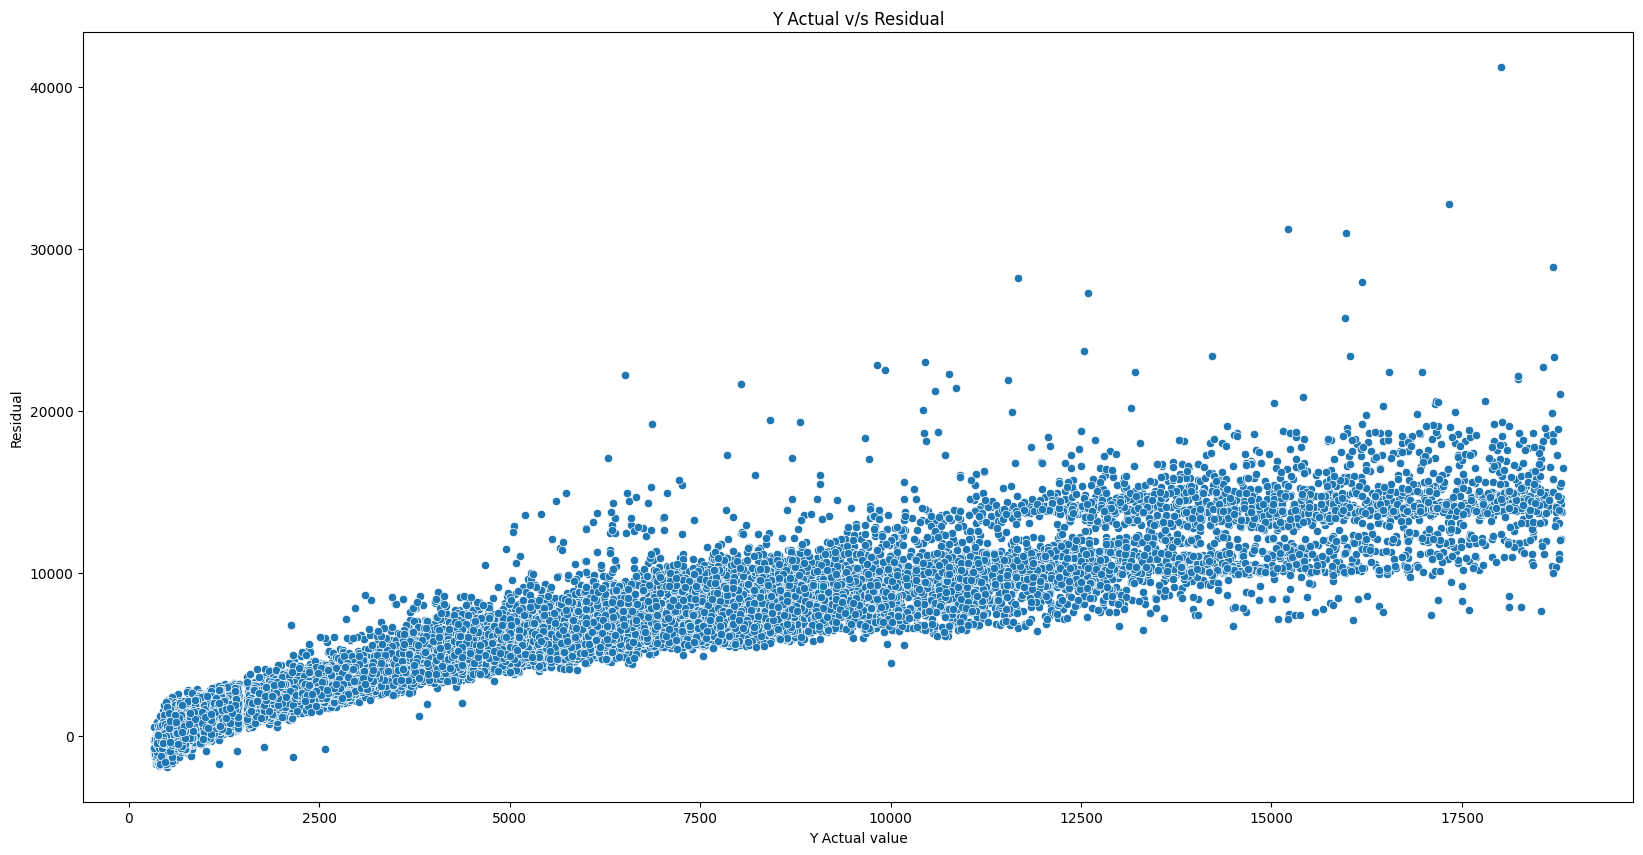

In [58]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = y_train, y = y_train_pred)
plt.xlabel('Y Actual value')
plt.ylabel('Residual')
plt.title('Y Actual v/s Residual')

In [59]:
print("R-Squared value for testing is  :", r2_test_value)
print("R-Squared value for training is :", r2_train_value)

R-Squared value for testing is  : 0.8934098514610745
R-Squared value for training is : 0.8919215691628422


## The model is best model.
#### It is performing well on training as well as testing data.
### It is low bias and low variance.

In [60]:
linear_reg.predict(x_train.head(1))[0]

443.51523892764635

### Model Testing

In [61]:
x_test[5000:5001]

,carat,cut,color,clarity,depth,table,x,y,z
14467,1.02,3,4,1,62.7,57.0,6.42,6.5,4.05


In [62]:
linear_reg.predict(x_test[5000:5001])[0]

4862.4367508762125

In [63]:
linear_reg.n_features_in_

9

In [64]:
carat = 1.02
cut = 'Ideal'
color = 'G'
clarity = 'I1'
depth = 62.7
table = 57.0
x = 6.42
y = 6.5
z = 4.05

cut = cut_labels[cut]
color = color_labels[color]
clarity = clarity_labels[clarity]

In [65]:
test_array = np.zeros((1,linear_reg.n_features_in_))
test_array[0][0] = carat
test_array[0][1] = cut
test_array[0][2] = color
test_array[0][3] = clarity
test_array[0][4] = depth
test_array[0][5] = table
test_array[0][6] = x
test_array[0][7] = y
test_array[0][8] = z

predicted_price = np.around([1, linear_reg.predict(test_array)][0])

In [75]:
with open("diamond_data.pkl", "wb") as f:
    pickle.dump(linear_reg,f)

In [76]:
diamondprice = {'cut' : cut_labels, 'color' : color_labels, 'clarity' : clarity_labels}

with open("diamond_project.json", "w") as f:
    json.dump(diamondprice, f)